# Installing and importing packages

In [ ]:
! pip install tweepy

In [ ]:
! pip install PyDrive

In [ ]:
# Run this cell to import the packages you will need to unpack the dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pickle
import os
import zipfile
import scipy.ndimage
from google.colab import files
from scipy import stats

import tweepy
import sys
import json
import codecs
from tweepy.parsers import JSONParser

# Getting new dataset that is cleaned

In [ ]:
### authentication -- run once 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
### lists the files in the folder 
file_list = drive.ListFile({'q': "'18sX8Dymv_AAEaY7mJxbmh_LjljD8oRwK' in parents and trashed=false"}).GetList() ## long string in the url of folder
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: true_ans_df, id: 1iSOAZSYZErO9Fq5w1_qSalMP-x8DaVPKO1-SKz1eVOA
title: wrong_ans_df.csv, id: 1_j6ilNKGL71BqM262Vg8KTTiu9jT6ete
title: true_ans_df.csv, id: 1drwwnkULVoMfKRJBkj-mCyaIlbRtPli5
title: data_VEC, id: 1re1jFEQvnyeGuryQkl_dWaNoLnLBkN8Y44cIa6LqeJg
title: data_VEC.csv, id: 1_oB0pdMdaHbVl6YllHKDFJGukhhfK-Iz
title: Data CLEAN, id: 1pgellPyb7ynUHU64Prm0xZwI4-sqfw3M
title: Original Tweets, id: 1yDewPt327TxTrKCvuCIpHNyigDMaKPyv
title: bully_victim1.csv, id: 1ngNQ_sLWIAnN7scAxJl4-y8QZB_soeTQ
title: bully_victim.csv, id: 1qud97IBO3rkLkmDJTi-Y8U--waH7v6tb
title: data_categorical_multi.csv, id: 10qfXUcLUW4GPBM1ra3_cRBpnW9ltQEh-
title: data_categorical_binary.csv, id: 1Mn0cT-De4mq-9gJ7J2s201jvZQ1bWNGK
title: glove.6B.100d.txt, id: 1-FOMH_1xZcjtYo1uW3_2BwozqHFC-dZb
title: glove.6B.zip, id: 1tuFKpS8F1lhnaemAYi_w498Vli6WGuKP
title: data_tweet_clean_500_stop.csv, id: 1bUddQJ0LejpEROhpWmMtYYSoXvR2q4pc
title: data_Tweet_clean.csv, id: 1FNa4-dHR6aEeunRIwMnaBBacSlCHZOsW
title: Medication_1, i

In [ ]:

### download the file 
file_downloaded = drive.CreateFile({'id': '1ngNQ_sLWIAnN7scAxJl4-y8QZB_soeTQ'})
file_downloaded.GetContentFile('bully_victim1.csv')

df_data = pd.read_csv('bully_victim1.csv', dtype = object)
df_data.head(100)

,Unnamed: 0,Tweet ID,Bully/Victims
0,0,103925126613045250,3
1,1,108340745324335104,2
2,2,100335301150507008,2
3,3,108042149437779970,3
4,4,102433486769627136,3
5,5,103257266811187200,3
6,6,104181309462683649,3
7,7,101776234794590208,2
8,8,101384670347931648,3
9,9,103298006077538305,3


# Authenticating Twitter Process

In [ ]:
####### Access Information #################

# Parameter you need to specify
consumer_key = '7w9qPKMQzbCNvx4cjVoaLqjjt'
consumer_secret = 'bj8lNT1yJTkZHlIbg6n7NEBTX73oQttmbPy7nCUuEcYEuldt7O'
access_key = '4439149653-6eK3Z25ODtI3sg7rv3NqNLAWmO6vz270Lewq1tD'
access_secret = 'AJtrhAdfUmWjWnirvASSsp5PEjDbiNwO5XBDxeSuLypxs'

inputFile = 'tweet_id'
outputFile = 'tweet.json'

#############################################

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth_handler=auth, parser=JSONParser())

# Getting Data from Tweets and Analyzing variables 

In [ ]:
! pip install nltk

In [ ]:

text_feature = list()

In [ ]:
indices_to_drop = list()
print(df_data.shape)
for i in range(0, 219):
  try:
    tweet = api.get_status(int(df_data['Tweet ID'][i]))
    text = tweet['text'].encode('ascii', 'ignore')
    text_feature.append(text)   
  except tweepy.error.TweepError:
    print(tweepy.error.TweepError)
    indices_to_drop.append(i)
    pass

  if i % 50 == 0:
    print(i)


In [ ]:
len(indices_to_drop)

In [ ]:
api.wait_on_rate_limit

In [ ]:
print(df_data.head(15))
df_data.shape[0]
print(df_data['Bully/Victims'][9])

   Unnamed: 0            Tweet ID Bully/Victims
0           0  103925126613045250             3
1           1  108340745324335104             2
2           2  100335301150507008             2
3           3  108042149437779970             3
4           4  102433486769627136             3
5           5  103257266811187200             3
6           6  104181309462683649             3
7           7  101776234794590208             2
8           8  101384670347931648             3
9           9  103298006077538305             3
10         10  107762666738683904             3
11         11  103111053377929216             3
12         12  106039023943942144             2
13         13  102200003287715841             3
14         14  103097898278993920             3
3


In [ ]:
for i in range(0, 2):
  tweet = api.get_status(int(df_data['Tweet ID'][i]))
  print(tweet['user'])
    #text = tweet['text'].encode('ascii', 'ignore')

{'id': 14721679, 'id_str': '14721679', 'name': 'melia', 'screen_name': 'meliaruby', 'location': 'moominvalley', 'description': 'in a dream you saw a way to survive and you were full of joy', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 192, 'friends_count': 275, 'listed_count': 11, 'created_at': 'Sat May 10 05:09:27 +0000 2008', 'favourites_count': 11782, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 46299, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '69363B', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1107332519115087878/euWrTi1l_normal.jpg', 'profile_image_url_https': 'https://pbs.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})
print(df_data.shape[0])

In [ ]:
indices_to_drop = list()
listX=[]
listX2 = []
listV=[]
listB = []
for i in range(0, df_data.shape[0]):
  try:
    tweet = api.get_status(int(df_data['Tweet ID'][i]))
    if tweet['user']['friends_count'] < 2000:
      if int(df_data['Bully/Victims'][i]) == 2:
        listX.append(i)
        listV.append(tweet['user']['friends_count'])
      if int(df_data['Bully/Victims'][i]) == 3:
        listB.append(tweet['user']['friends_count'])
        listX2.append(i)
    #if tweet['user']['friends_count'] < 2000 and tweet['user']['friends_count'] > 1000:
#       listB.append(tweet['user']['friends_count'])
#       listX2.append(i)
    #text = tweet['text'].encode('ascii', 'ignore')
    #text_feature.append(text)   
  except tweepy.error.TweepError:
    print(tweepy.error.TweepError)
    indices_to_drop.append(i)
    pass

  if i % 50 == 0:
    print(i)


0
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
50
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
100
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
150
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
200
<class 'tweepy.error.TweepError'>


[1, 2, 7, 12, 16, 17, 23, 25, 26, 27, 32, 38, 39, 45, 46, 47, 51, 53, 55, 62, 64, 65, 66, 68, 71, 81, 87, 89, 92, 94, 98, 100, 102, 104, 109, 110, 112, 113, 114, 117, 120, 125, 129, 131, 132, 134, 135, 136, 140, 141, 145, 147, 154, 157, 158, 173, 179, 184, 186, 190, 191, 192, 199, 203, 205, 208, 217, 218]
562.1764705882352
[0, 3, 4, 5, 6, 9, 10, 11, 13, 14, 15, 19, 20, 21, 22, 24, 28, 29, 30, 31, 33, 34, 35, 36, 40, 41, 42, 43, 49, 50, 52, 54, 56, 57, 58, 59, 67, 69, 70, 72, 74, 75, 77, 78, 79, 80, 83, 84, 85, 88, 91, 93, 95, 96, 97, 99, 101, 105, 108, 115, 118, 121, 122, 123, 124, 126, 127, 128, 130, 133, 137, 138, 139, 142, 143, 144, 146, 151, 152, 153, 155, 156, 159, 160, 162, 163, 164, 166, 168, 169, 171, 172, 174, 175, 176, 178, 181, 182, 183, 185, 187, 188, 189, 194, 195, 196, 197, 198, 200, 201, 202, 204, 206, 209, 210, 211, 212, 213, 214, 216]
531.3416666666667
Ttest_indResult(statistic=0.4406265334122523, pvalue=0.6599950639894359)


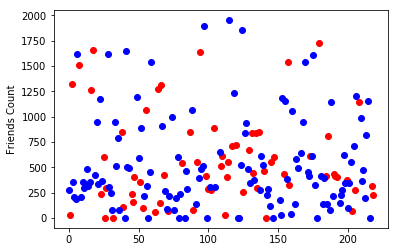

In [ ]:
print(listX)
print(sum(listV)/len(listV))  
print(listX2)
print(sum(listB)/len(listB))
print(stats.ttest_ind(listV, listB))
#listY.sort().reverse()
#print(listY)
plt.plot(listX,listV,'ro',listX2,listB,'bo')
#t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^'
plt.ylabel('Friends Count')
plt.show()

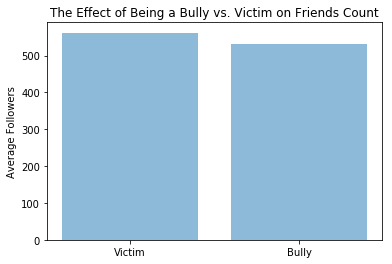

In [ ]:
v_avg = sum(listV)/len(listV)
b_avg = sum(listB)/len(listB)

objects = ('Victim', 'Bully')
y_pos = np.arange(len(objects))
f_avg = [v_avg,b_avg]

plt.bar(y_pos, f_avg, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Followers')
plt.title('The Effect of Being a Bully vs. Victim on Friends Count')

plt.show()



In [ ]:
listV_1 = np.array(listV)
np.std(listV_1)

444.71600128543605

In [ ]:
np.std(np.array(listB))
       

466.2519078751552